# How do we find clusters?

Humans are quite good in quickly finding clusters when looking at the data visualizations above. The problem is, how to make a machine find clusters.

http://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py

## Meanshift
sklearn.cluster.Meanshift
#### Bandwith is the size of the cirle
And below shows how a window is moving into the center of a cluster
![](images/meanshift.gif)
The cirle window above would be one of many windows that are distributed over the feature space.
The circle moves towards the highest density of feature vectors. The mean of the distance to each neighbour is calculated and the circle is moved to the mean value. This happens over several iterations untill all windows are finished moving. Finally all windows on same location are merged and all features are moved to neares cluster.

Choosing initial number of windows, size of windows, distance between neighbours etc. 
![](https://i.stack.imgur.com/A871k.jpg)


In [13]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# The bandwidth is the distance/size scale of the kernel function, i.e. 
# sklearn.cluster module offers an estimate_bandwith() function based on a nearest-neighbor analysis.
# quantile should be between [0, 1] 0.5 means that the median of all pairwise distances is used

def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

Number of estimated clusters : 4


<IPython.core.display.Javascript object>


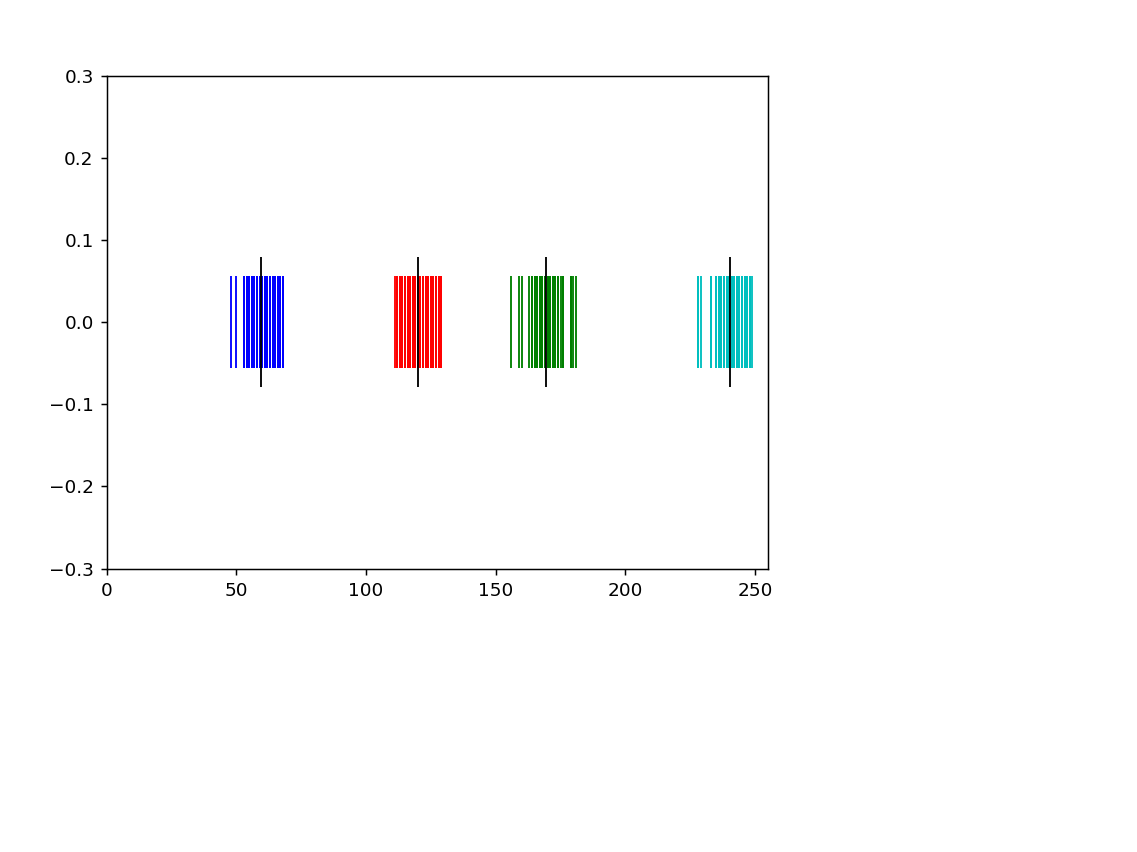

In [14]:
%matplotlib notebook
from itertools import cycle

labels, cluster_centers, n_clusters = mean_shift(data_1d)

plt.cla()
plt.xlim(0, 255)
plt.ylim(-0.3, 0.3)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x = data_1d[my_members, 0]
    y = np.zeros(np.shape(x))

    plt.plot(x , y, col + '|', ms=50)
    plt.plot(cluster_center[0] , 0, 'k|', ms=70)

plt.show()

Number of estimated clusters : 3


<IPython.core.display.Javascript object>


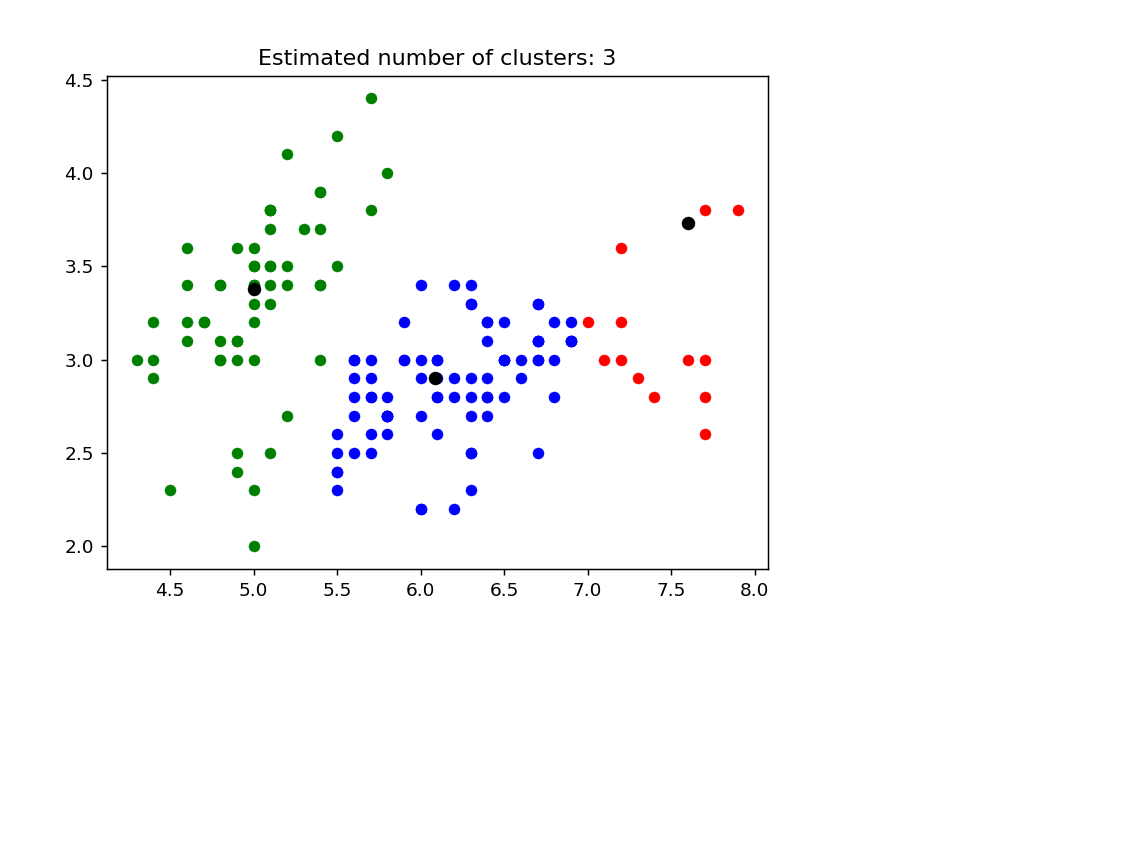

In [15]:
%matplotlib notebook
from itertools import cycle


labels, cluster_centers, n_clusters = mean_shift(data_2d)

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

Number of estimated clusters : 1


<IPython.core.display.Javascript object>


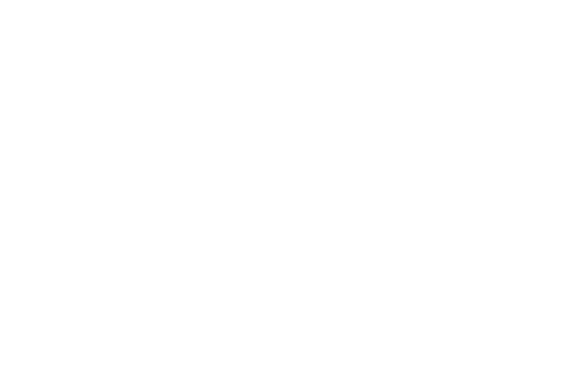

In [14]:
%matplotlib notebook
from itertools import cycle


labels, cluster_centers, n_clusters = mean_shift(data_3d)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y, z = data_3d[my_members,0], data_3d[my_members,1], data_3d[my_members,2]
    ax.scatter(x, y, z, c=col,  linewidth=0.2, alpha=0.1)
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], s=150, c='k')
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

In [10]:
import pandas as pd


filename = './iris_data.csv'
df = pd.read_csv(filename)
df

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,I. virginica
146,6.3,2.5,5.0,1.9,I. virginica
147,6.5,3.0,5.2,2.0,I. virginica
148,6.2,3.4,5.4,2.3,I. virginica


<IPython.core.display.Javascript object>


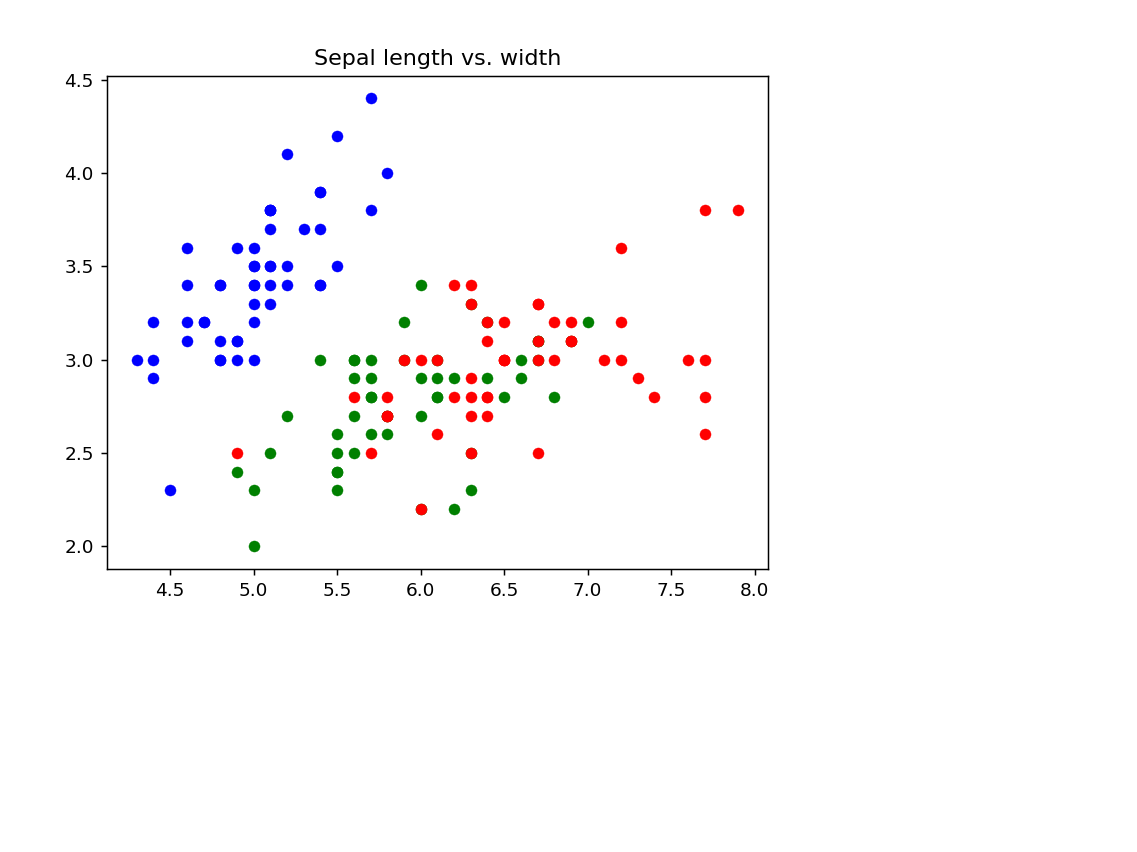

I. setosa b
I. versicolor g
I. virginica r


In [11]:
labels = np.unique(df['Species'])

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for label, col in zip(labels, colors):
    print(label, col)
    x = df[df['Species'] == label]['Sepal length']
    y = df[df['Species'] == label]['Sepal width']

    ax.scatter(x, y, c=col,  linewidth=0.2)
    
plt.title('Sepal length vs. width')
plt.show()

Number of estimated clusters : 1


<IPython.core.display.Javascript object>


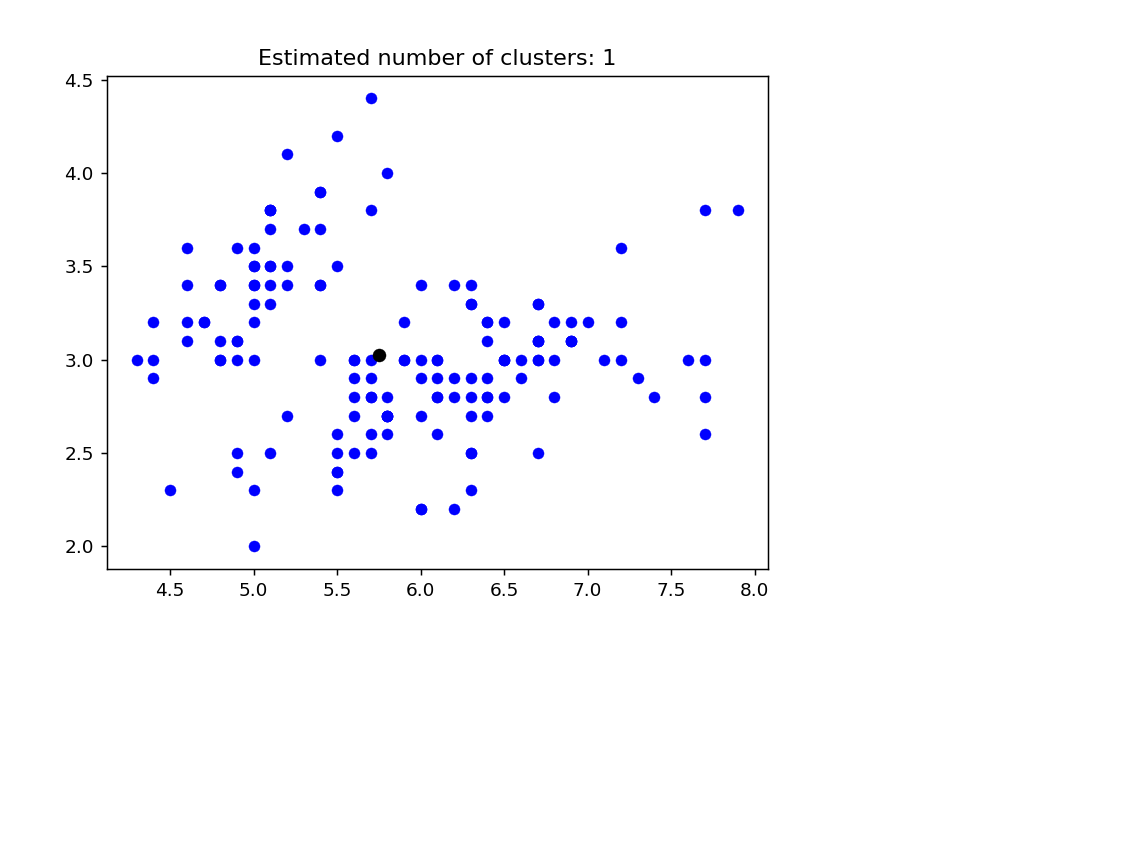

In [12]:
data_2d = df[['Sepal length', 'Sepal width']].values
labels, cluster_centers, n_clusters = mean_shift(data_2d)

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col,  linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

# Self study on meanshift

  * http://stackoverflow.com/a/17912660
  * http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/
  * https://en.wikipedia.org/wiki/Mean_shift
  * https://github.com/mattnedrich/MeanShift_py

```bash
git clone https://github.com/mattnedrich/MeanShift_py.git
```

The following is the entry from Stackoverflow http://stackoverflow.com/a/17912660 explaining the mean shift algorithm.